In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
sns.set_context('poster')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
import xgboost as xgb

# Importing from my own modules
import sys
sys.path.append('../financial_forecasting')
from utils import load_data, wMSE, train_and_test_models
from preprocessing import Imputer, LogTransformer, MeanEncoder, TreeBinner

# Load preprocessed data

In [2]:
X_train = pd.read_csv('../data/preprocessed/train.csv')
X_val = pd.read_csv('../data/preprocessed/validation.csv')
X_test = pd.read_csv('../data/preprocessed/test.csv')

weights_train = pd.read_csv('../data/preprocessed/train_weights.csv', squeeze=True)
weights_val = pd.read_csv('../data/preprocessed/validation_weights.csv', squeeze=True)

y_train = pd.read_csv('../data/preprocessed/train_target.csv', squeeze=True)
y_val = pd.read_csv('../data/preprocessed/validation_target.csv', squeeze=True)

# XGboost baseline with all features

In [3]:
# All features
all_vars = set(X_train.columns)
enabled_vars = all_vars

models = OrderedDict([
                      ('xgboost', xgb.sklearn.XGBRegressor(n_estimators=100, n_jobs=-1)), 
                    ])

df_preds_train, df_preds_test, train_error, test_error = train_and_test_models(models, 
                                                         X_train.loc[:,enabled_vars], y_train, 
                                                         X_val.loc[:,enabled_vars], y_val, 
                                                         weights_train, weights_val)

Fitting: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train error: 1.0386562953915734e-06 Test error: 1.0362369240746296e-06 



# XGboost non-zero gain feature importance

In [19]:
# Get gain feature importance from xgboost
booster = models['xgboost'].get_booster()
non_zero_feature_importance = pd.Series(booster.get_score(importance_type='gain'))

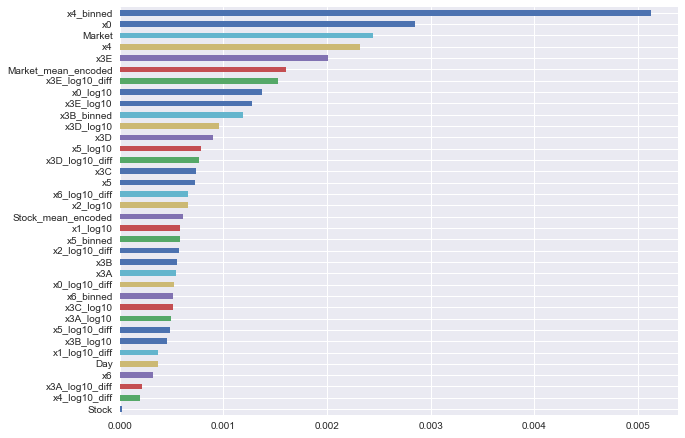

In [27]:
non_zero_feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=[10,7.5])

In [29]:
# Examine performance on non-zero feature importance features

enabled_vars = non_zero_feature_importance.index

models = OrderedDict([
                      ('xgboost', xgb.sklearn.XGBRegressor(n_estimators=100, n_jobs=-1)), 
                    ])

df_preds_train, df_preds_test, train_error, test_error = train_and_test_models(models, 
                                                         X_train.loc[:,enabled_vars], y_train, 
                                                         X_val.loc[:,enabled_vars], y_val, 
                                                         weights_train, weights_val)

Fitting: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train error: 1.0386562953915734e-06 Test error: 1.036225582849118e-06 



# Best features 

In [30]:
best_feats_so_far = ['Day',
 'Day_mean_encoded',
 'Market',
 'Market_mean_encoded',
 'Stock',
 'Stock_mean_encoded',
 'x0',
 'x0_log10',
 'x1',
 'x1_binned',
 'x2_log10',
 'x3A',
 'x3A_log10',
 'x3B',
 'x3C',
 'x3C_log10',
 'x3D',
 'x3D_log10',
 'x3E',
 'x3E_binned',
 'x3E_log10',
 'x4',
 'x4_binned',
 'x4_log10',
 'x5',
 'x5_log10',
 'x6',
 'x6_binned']

In [31]:
# Examine performance on previously found best features

enabled_vars = best_feats_so_far

models = OrderedDict([
                      ('xgboost', xgb.sklearn.XGBRegressor(n_estimators=100, n_jobs=-1)), 
                    ])

df_preds_train, df_preds_test, train_error, test_error = train_and_test_models(models, 
                                                         X_train.loc[:,enabled_vars], y_train, 
                                                         X_val.loc[:,enabled_vars], y_val, 
                                                         weights_train, weights_val)

Fitting: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train error: 1.0461734682230817e-06 Test error: 1.0408616901452266e-06 

